In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
with open('check1.pkl','rb') as picklefile:
    data = pickle.load(picklefile)

In [3]:
data.head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime
6,BAS,94.770,94.830,94.75,94.750,7676,49,2018-02-01 08:00:00
7,BAYN,105.920,105.960,105.84,105.860,6706,32,2018-02-01 08:00:00
9,EOAN,8.517,8.517,8.50,8.505,11232,13,2018-02-01 08:00:00
15,BMW,92.360,92.360,91.93,91.930,14755,80,2018-02-01 08:00:00
40,SAP,91.510,91.550,91.43,91.550,7297,64,2018-02-01 08:00:00


In [5]:
data.reset_index(inplace = True)
del data['index']
data.head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime
0,BAS,94.770,94.830,94.75,94.750,7676,49,2018-02-01 08:00:00
1,BAYN,105.920,105.960,105.84,105.860,6706,32,2018-02-01 08:00:00
2,EOAN,8.517,8.517,8.50,8.505,11232,13,2018-02-01 08:00:00
3,BMW,92.360,92.360,91.93,91.930,14755,80,2018-02-01 08:00:00
4,SAP,91.510,91.550,91.43,91.550,7297,64,2018-02-01 08:00:00


In [6]:
data.Mnemonic.unique()

array(['BAS', 'BAYN', 'EOAN', 'BMW', 'SAP', 'VOW3', 'ALV', 'DBK', 'DAI',
       'SIE'], dtype=object)

In [7]:
dfs = []
for i in data.Mnemonic.unique():
    dfs.append(data[data.Mnemonic==i])

In [8]:
dfs[0].head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime
0,BAS,94.77,94.83,94.75,94.75,7676,49,2018-02-01 08:00:00
7,BAS,94.70,94.70,94.59,94.59,1935,17,2018-02-01 08:01:00
14,BAS,94.63,94.75,94.61,94.75,5429,31,2018-02-01 08:02:00
24,BAS,94.76,94.77,94.69,94.73,3582,44,2018-02-01 08:03:00
34,BAS,94.71,94.72,94.66,94.69,8392,46,2018-02-01 08:04:00


In [9]:
for i in dfs:
    i.reset_index(inplace=True)
    del i['index']
dfs[0].head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime
0,BAS,94.77,94.83,94.75,94.75,7676,49,2018-02-01 08:00:00
1,BAS,94.70,94.70,94.59,94.59,1935,17,2018-02-01 08:01:00
2,BAS,94.63,94.75,94.61,94.75,5429,31,2018-02-01 08:02:00
3,BAS,94.76,94.77,94.69,94.73,3582,44,2018-02-01 08:03:00
4,BAS,94.71,94.72,94.66,94.69,8392,46,2018-02-01 08:04:00


In [10]:
for i in dfs:
    print(min(i['DateTime']))

2018-02-01 08:00:00
2018-02-01 08:00:00
2018-02-01 08:00:00
2018-02-01 08:00:00
2018-02-01 08:00:00
2018-02-01 08:00:00
2018-02-01 08:00:00
2018-02-01 08:02:00
2018-02-01 08:02:00
2018-02-01 08:02:00


In [11]:
allTimes = sorted(data.DateTime.unique())
q = 0
for i in dfs:
    for j in allTimes:
        if j in i['DateTime'] and len(i[i.DateTime==j])>1:
            print('DANGER')
            q = 1
print(q)

0


In this cell, we're going to fill in the missing values.  I'm assuming that if a data point doesn't exist for a given company for a given time, that company's stock was not traded during that time, so its price should be held constant.

In [12]:
from copy import deepcopy
allTimes = sorted(data['DateTime'].drop_duplicates())
dfsnew = []
for i in dfs:
    df = pd.DataFrame(columns = ['Mnemonic','StartPrice','MaxPrice','MinPrice','EndPrice','TradedVolume','NumberOfTrades','DateTime'])
    j = 0
    base = i[i.DateTime==min(i['DateTime'])]
    print(base)
    base.reset_index(inplace = True)
    iTimes = sorted(i['DateTime'].drop_duplicates())
    for k in range(len(allTimes)):
        if allTimes[k]>base.DateTime[0]:
            if allTimes[k] not in iTimes:
                df.loc[j] = [base['Mnemonic'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],0,0,allTimes[k]]
                j+=1
            else:
                base = i[i.DateTime==allTimes[k]]
                base.reset_index(inplace = True)
    i = pd.concat([i,df])
    i.sort_values('DateTime',inplace=True)
    print(len(i))
    dfsnew.append(deepcopy(i))
for i in dfsnew:
    print(len(i))

  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice  TradedVolume  \
0      BAS       94.77     94.83     94.75     94.75          7676   

   NumberOfTrades            DateTime  
0              49 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice  TradedVolume  \
0     BAYN      105.92    105.96    105.84    105.86          6706   

   NumberOfTrades            DateTime  
0              32 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice  TradedVolume  \
0     EOAN       8.517     8.517       8.5     8.505         11232   

   NumberOfTrades            DateTime  
0              13 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice  TradedVolume  \
0      BMW       92.36     92.36     91.93     91.93         14755   

   NumberOfTrades            DateTime  
0              80 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice  TradedVolume  \
0      SAP       91.51

Not all companies were traded in the first few minutes of the first day, so in this cell, we'll fill in those values so that all companies have the same number of entries.

In [13]:
dfsnew2=[]
allTimes = sorted(data['DateTime'].drop_duplicates())
for i in dfsnew:
    df = pd.DataFrame(columns = ['Mnemonic','StartPrice','MaxPrice','MinPrice','EndPrice','TradedVolume','NumberOfTrades','DateTime'])
    j = 0
    base = i[i.DateTime==min(i['DateTime'])]
    print(base)
    base.reset_index(inplace = True)
    iTimes = sorted(i['DateTime'].drop_duplicates())
    for k in range(len(allTimes)):
        if allTimes[k]<base.DateTime[0]:
                df.loc[j] = [base['Mnemonic'][0],base['StartPrice'][0],base['StartPrice'][0],base['StartPrice'][0],base['StartPrice'][0],0,0,allTimes[k]]
                j+=1
        else:
            break
    i = pd.concat([i,df])
    i.sort_values('DateTime',inplace=True)
    print(len(i))
    dfsnew2.append(i)

  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      BAS       94.77     94.83     94.75     94.75         7676   

  NumberOfTrades            DateTime  
0             49 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0     BAYN      105.92    105.96    105.84    105.86         6706   

  NumberOfTrades            DateTime  
0             32 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0     EOAN       8.517     8.517       8.5     8.505        11232   

  NumberOfTrades            DateTime  
0             13 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      BMW       92.36     92.36     91.93     91.93        14755   

  NumberOfTrades            DateTime  
0             80 2018-02-01 08:00:00  
10056
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      SAP       91.51     91.55     91

Now we need to fill in the missing times.

In [14]:
mDays = ['06','09']
mHr = ['15']
mMin = ['00','01','02','03','04','05','06','07','08','09'] + [str(x) for x in range(10,60)]
MTIMES = pd.to_datetime(['201802'+x+y+z for x in mDays for y in mHr for z in mMin], format = '%Y%m%d%H%M')
print(len(MTIMES))

120


In this cell, we're filling in the missing times. That there weren't files for.

In [15]:
dfsnew3=[]
for i in dfsnew2:
    flag = 0
    print(i.head(1))
    df = pd.DataFrame(columns = ['Mnemonic','StartPrice','MaxPrice','MinPrice','EndPrice','TradedVolume','NumberOfTrades','DateTime'])
    iTimes = sorted(i['DateTime'].drop_duplicates())
    print(len(iTimes))
    if len(iTimes)!=len(i['DateTime']):
        print('Danger! Code Blue!')
        break
    j = 0
    base = i[i.DateTime==iTimes[0]]
    base.reset_index(inplace = True)
    u = 0
    while(iTimes[u] < min(MTIMES)):
        base = i[i.DateTime==iTimes[u]]
        base.reset_index(inplace = True)
        u+=1
    if(len(base)>1):
        print('Danger! Code Orange!')
        break
    for k in range(60):
        if MTIMES[k] not in iTimes:
                df.loc[j] = [base['Mnemonic'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],0,0,MTIMES[k]]
                j+=1
        else:
            print('Danger! Code Red!')
            break
    while(iTimes[u] < MTIMES[60]):
        base = i[i.DateTime==iTimes[u]]
        base.reset_index(inplace=True)
        u+=1
    for k in range(60,120):
        if MTIMES[k] not in iTimes:
            df.loc[j] = [base['Mnemonic'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],0,0,MTIMES[k]]
            j+=1
        else:
            print('Danger! Code Red Second!')
            break
    while(u<len(iTimes) and iTimes[u] not in MTIMES):
        u+=1
    if(u<len(iTimes)):
        print('Danger! Code Purple!')
    i = pd.concat([i,df])
    i.sort_values('DateTime',inplace=True)
    print(len(i))
    dfsnew3.append(i)    

  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      BAS       94.77     94.83     94.75     94.75         7676   

  NumberOfTrades            DateTime  
0             49 2018-02-01 08:00:00  
10056
10176
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0     BAYN      105.92    105.96    105.84    105.86         6706   

  NumberOfTrades            DateTime  
0             32 2018-02-01 08:00:00  
10056
10176
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0     EOAN       8.517     8.517       8.5     8.505        11232   

  NumberOfTrades            DateTime  
0             13 2018-02-01 08:00:00  
10056
10176
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      BMW       92.36     92.36     91.93     91.93        14755   

  NumberOfTrades            DateTime  
0             80 2018-02-01 08:00:00  
10056
10176
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      SAP     

In [16]:
nDays = ['01','02','05','06','07','08','09'] + [str(x) for x in range(12,17)] + [str(x) for x in range(19,24)] + ['26','27','28']
nHr = ['08','09']+ [str(x) for x in range(10,16)]
nHr2 = ['16']
nMin = ['00','01','02','03','04','05','06','07','08','09'] + [str(x) for x in range(10,60)]
nMin2 = ['0'+str(x) for x in range(10)] + [str(x) for x in range(10,31)]
NTIMES = pd.to_datetime(['201802'+x+y+z for x in nDays for y in nHr for z in nMin], format = '%Y%m%d%H%M')
NTIMES2 = pd.to_datetime(['201802'+x+y+z for x in nDays for y in nHr2 for z in nMin2], format = '%Y%m%d%H%M')
NTIMES3 = NTIMES.union(NTIMES2)
print(NTIMES3[0:10])
print(len(NTIMES3))

DatetimeIndex(['2018-02-01 08:00:00', '2018-02-01 08:01:00',
               '2018-02-01 08:02:00', '2018-02-01 08:03:00',
               '2018-02-01 08:04:00', '2018-02-01 08:05:00',
               '2018-02-01 08:06:00', '2018-02-01 08:07:00',
               '2018-02-01 08:08:00', '2018-02-01 08:09:00'],
              dtype='datetime64[ns]', freq=None)
10220


Here, we're filling in any remaining times during which a given company may not have been traded.

In [17]:
NTIMES3 = sorted(NTIMES3)
dfsnew4=[]
for i in dfsnew3:
    df = pd.DataFrame(columns = ['Mnemonic','StartPrice','MaxPrice','MinPrice','EndPrice','TradedVolume','NumberOfTrades','DateTime'])
    iTimes = sorted(i['DateTime'].drop_duplicates())
    print(len(iTimes))
    if len(iTimes)!=len(i['DateTime']):
        print('Danger! Code Blue!')
        break
    j = 0
    base = i[i.DateTime==iTimes[0]]
    base.reset_index(inplace = True)
    u = 0
    while u<len(NTIMES3):
        while(u<len(NTIMES3) and NTIMES3[u] in iTimes):
            if(u<len(iTimes)):
                base = i[i.DateTime==iTimes[u]]
            else:
                base = i[i.DateTime==iTimes[-1]]
            if(len(base)>1):
                print('Danger! Code Orange! Internal!')
                print(u)
            base.reset_index(inplace = True)
            u+=1
        while(u<len(NTIMES3) and NTIMES3[u] not in iTimes):
            df.loc[j] = [base['Mnemonic'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],base['EndPrice'][0],0,0,NTIMES3[u]]
            j+=1
            u+=1
    i = pd.concat([i,df])
    i.sort_values('DateTime',inplace=True)
    print(len(i))
    dfsnew4.append(i) 

10176
10220
10176
10220
10176
10220
10176
10220
10176
10220
10176
10220
10176
10220
10176
10220
10176
10220
10176
10220


Let's look at an example price chart.

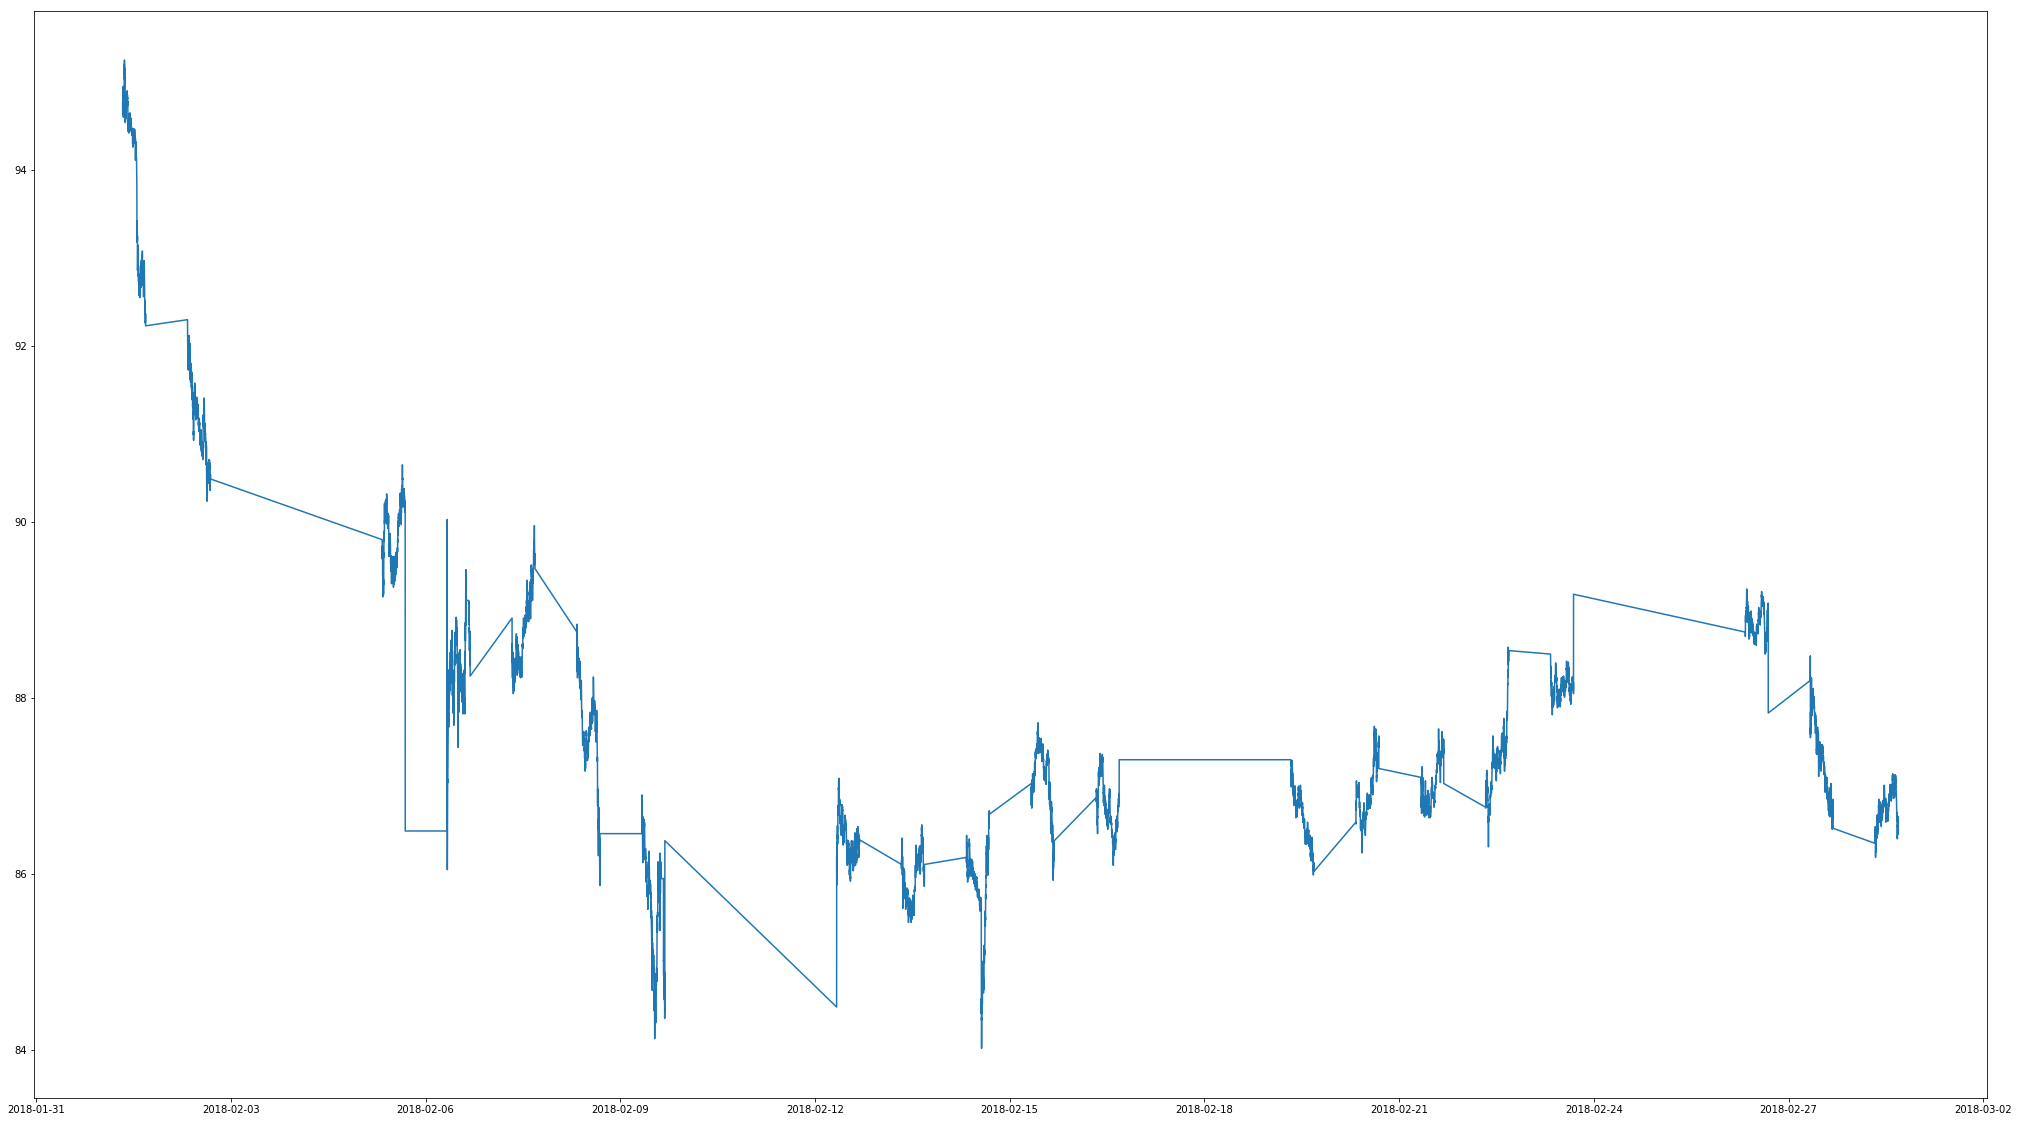

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (35,20))
i = 0
plt.plot(dfsnew4[i]['DateTime'],dfsnew4[i]['StartPrice']);

In [21]:
import pickle
with open('check2.pkl', 'wb') as picklefile:
    pickle.dump(dfsnew4, picklefile)